In [1]:
import pandas as pd
df=pd.read_csv('spam_NUS_1.csv',encoding='latin-1')

df2=pd.read_csv('spam_detection_sample_dataset.csv')


In [3]:
df.head()

df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:

df2.drop(['id','type','timestamp','source'],axis=1,inplace=True)



In [8]:


df.rename(columns={'v1':'label', 'v2':'text'}, inplace=True)

In [9]:

df['label']=df['label'].map({'ham': 0, 'spam': 1}).astype(int)
df.head()


,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df2.head()

,text,label
0,Don't miss out on this investment opportunity!...,0
1,Important: New login from unfamiliar location....,1
2,Exclusive offer for premium members. Upgrade y...,1
3,Get a 50% discount on all items. Limited time ...,1
4,COVID-19 support available. Sign up for assist...,0


In [13]:
df.shape

(5572, 2)

In [14]:
# prompt: concat df with df2 it should concat df2 at end of df

df = pd.concat([df, df2], ignore_index=True)
df.shape

(5672, 2)

In [16]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalnum()]
    filtered_tokens = [w for w in lemmas if not w in stop_words]
    return " ".join(filtered_tokens)

df['text_processed'] = df['text'].apply(preprocess_text)
print(df[['text', 'text_processed']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                text  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                      text_processed  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4                nah think go usf life around though  


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['text_processed'])

tfidf_array = tfidf_matrix.toarray()

# Adding the TF-IDF vectors as new columns to the DataFrame
for i in range(tfidf_matrix.shape[1]):
  df[f'tfidf_{i}'] = tfidf_array[:,i]

print(df.head())

Streaming output truncated to the last 5000 lines.
<ipython-input-18-f8b29a72bb4e>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tfidf_{i}'] = tfidf_array[:,i]
<ipython-input-18-f8b29a72bb4e>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'tfidf_{i}'] = tfidf_array[:,i]
<ipython-input-18-f8b29a72bb4e>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

   label                                               text  \
0      0  Go until jurong point, crazy.. Available only ...   
1      0                      Ok lar... Joking wif u oni...   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...   
3      0  U dun say so early hor... U c already then say...   
4      0  Nah I don't think he goes to usf, he lives aro...   

                                      text_processed  tfidf_0  tfidf_1  \
0  go jurong point crazy available bugis n great ...      0.0      0.0   
1                            ok lar joking wif u oni      0.0      0.0   
2  free entry 2 wkly comp win fa cup final tkts 2...      0.0      0.0   
3                u dun say early hor u c already say      0.0      0.0   
4                nah think go usf life around though      0.0      0.0   

   tfidf_2  tfidf_3  tfidf_4  tfidf_5  tfidf_6  ...  tfidf_7522  tfidf_7523  \
0      0.0      0.0      0.0      0.0      0.0  ...         0.0         0.0   
1      0.0      0.

In [20]:
from re import X
X=df.drop(['label','text','text_processed'],axis=1)
y=df['label']
X.head()

,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,tfidf_9,...,tfidf_7522,tfidf_7523,tfidf_7524,tfidf_7525,tfidf_7526,tfidf_7527,tfidf_7528,tfidf_7529,tfidf_7530,tfidf_7531
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
X_train=X[:5573] # old dataset
X_test=X[5573:] # generated Dataset
y_train=y[:5573]
y_test=y[5573:]

Accuracy: 0.41414141414141414
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        29
           1       1.00      0.17      0.29        70

    accuracy                           0.41        99
   macro avg       0.67      0.59      0.40        99
weighted avg       0.80      0.41      0.35        99



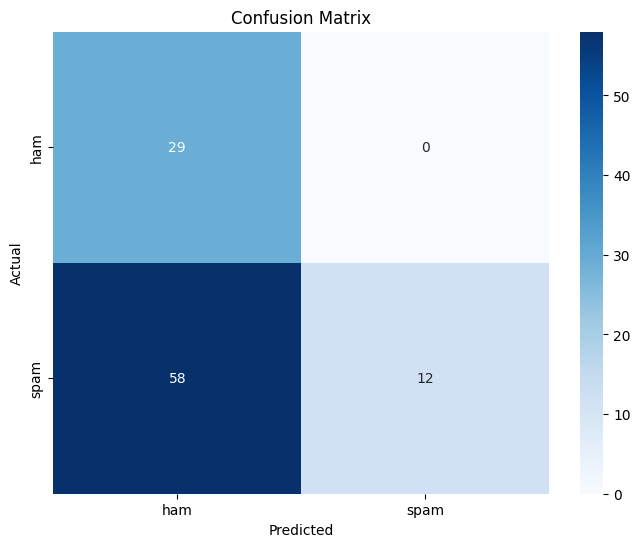

Accuracy: 0.41414141414141414
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        29
           1       1.00      0.17      0.29        70

    accuracy                           0.41        99
   macro avg       0.67      0.59      0.40        99
weighted avg       0.80      0.41      0.35        99



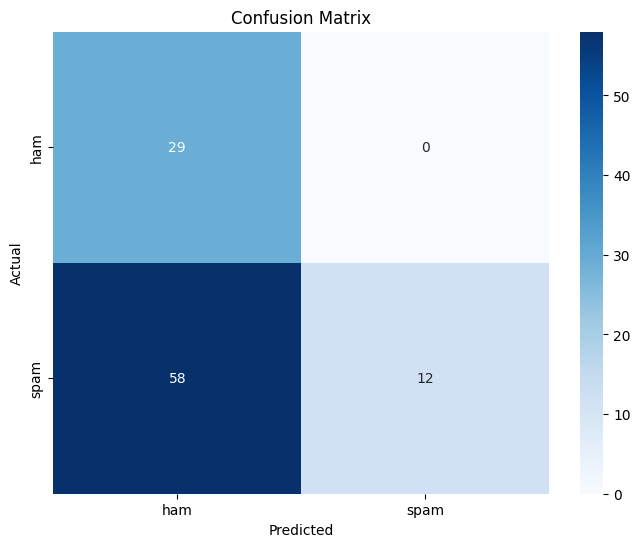

Accuracy: 0.41414141414141414
              precision    recall  f1-score   support

           0       0.33      1.00      0.50        29
           1       1.00      0.17      0.29        70

    accuracy                           0.41        99
   macro avg       0.67      0.59      0.40        99
weighted avg       0.80      0.41      0.35        99



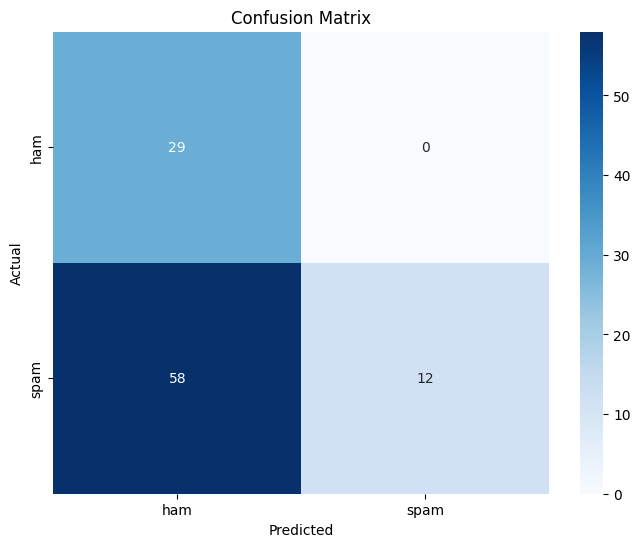

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def train_model(model_name, X_train, y_train):
      if model_name == 'svm':
          model = SVC()
      elif model_name == 'multinomial_nb':
          model = MultinomialNB()
      elif model_name == 'random_forest':
          model = RandomForestClassifier(n_estimators=100, random_state=42)
      else:
          raise ValueError("Invalid model name. Choose from 'svm', 'multinomial_nb', or 'random_forest'.")

      model.fit(X_train, y_train)
      return model


def predict_and_plot(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage (assuming X_train, y_train, X_test, y_test are defined as in your previous code)
svm_model = train_model('svm', X_train, y_train)
predict_and_plot(svm_model, X_test, y_test)

nb_model = train_model('multinomial_nb', X_train, y_train)
predict_and_plot(nb_model, X_test, y_test)

rf_model = train_model('random_forest', X_train, y_train)
predict_and_plot(rf_model, X_test, y_test)